<a href="https://colab.research.google.com/github/lalit-kumr/Data-Science-Projects/blob/master/time_series_2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis in python

## What is Time Series analysis?

Time series forecasting is a technique for the prediction of events indexed by time. This techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.


#### Time series forecasting is performed in a variety of applications including

-  Weather forecasting
-  Earthquake prediction
-  Astronomy
-  Statistics
-  Finance



#### There are two main goals of time series analysis: 
- identifying the nature of the phenomenon.
- forecasting the future values of the time series variable. 

Both of these goals require that the pattern the time series data is identified and decomposed in its components. Once the pattern is established, we can interpret and then extrapolate it to predict future events.


## Stages in Time Series Forecasting

The main steps of solving a time series problem are as follows:

- **0. Importing the data and necessary modules**

- **1. Visualizing time series**

 - In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.


- **2. Stationarising time series**

 - `A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.`
  - Most statistical forecasting methods are based on the assumption that the time series is stationary. We can make a time series into a stationairy time series by applying mathematical transformations to it.A stationary time series has a constant mean, median std deviaiton across its whole time period.


- **3. Finding the best parameters for our model**

 - We need to find optimal parameters for the forecasting models once we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting ACF and PACF graphs and finding optimal model parameters based on them.


- **4. Fitting model**

 - Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series.


- **5. Predictions**

 - After fitting our model, we will be predicting the future in this stage. Since we are now familiar with a basic flow of solving a time series problem, let us get to the implementation.



##  **0. Importing the data,cleaning it and necessary libraries**

In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
%matplotlib inline

In [18]:
#importing the dataset
df = pd.read_csv('https://github.com/lalit-kumr/demand-estimation-case-study/raw/main/Electricity%20Consumption.csv')

In [19]:
df.isna().sum()
# No blank values

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [20]:
df.columns = ['date','electricity']
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df

,electricity
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


## **1. Visualizing the time series**

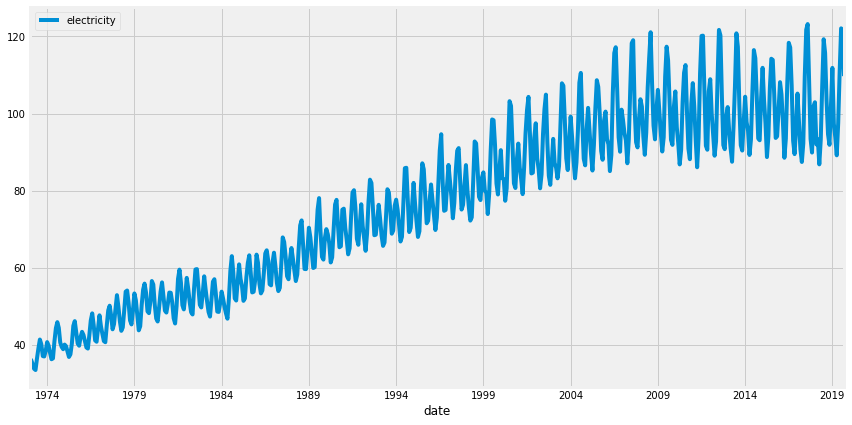

In [29]:
df.plot(figsize=(13,7))
# as we can see the line plot of the electricity consumption  has 2 main components:
#   - uptrend
#   - seasonal component

#### **Decomposing a Time series:**
- A time series consists of 4 components:
    - Trend
    - Seasonality
    - Cyclicity
    - Noise

**Trend**: Trend is the overall incresase or decrease overtime in a time series. It can be positive in nature(called uptrend) or negative in nature(downtrend). It can be of linear, log or any other form.

**Seasonality**: The repeating short-term cycle in the series are called seasons. Usually we take seasons as phenomena that repeat yearly.

**Cyclicity** : Cyclicity refers to long term patterns that occur on a scale of multiple years to decades. for exapmle the US is said to have recovered from the 2008 downturn  in 2016. so this overall change in its GDP will come under cyclicity part.

**Noise**: The random variation in the series.

In order to perform a time series analysis we need to seperate trend, seasons, cyclicity and noise from our series. The resultant series will become stationary through this process.

So let us decompose our time series

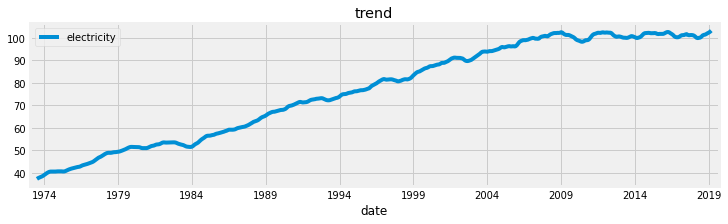

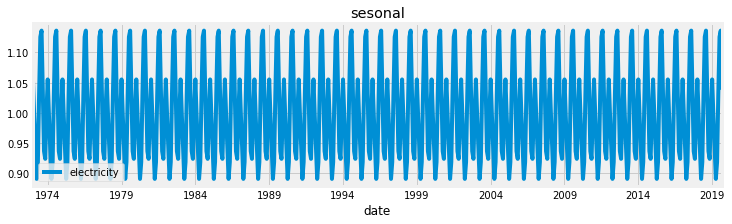

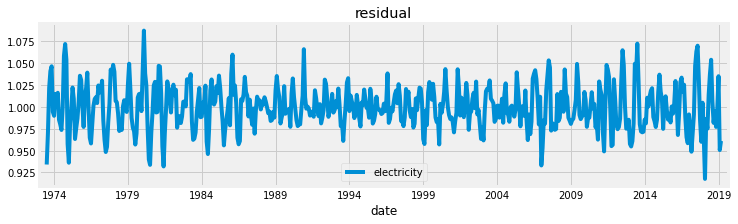

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df,model='multiplicative')
decompose.trend.plot(title='trend',figsize=(11,3))
decompose.seasonal.plot(title='sesonal',figsize=(11,3))
decompose.resid.plot(title='residual',figsize=(11,3))

### 2. Stationarising the time series.


Now we need to stationarize the time series. For this we use the ADFuller test.

#### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is a statistical tests used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:


**Null Hypothesis:** The series has a unit root (value of a =1) i.e series is non-stationary and has a time dependent structure.


**Alternate Hypothesis:** The series has no unit root.series is stationary


If we fail to reject the null hypothesis, we can say that the series is non-stationary. 


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.


The following function is one that can plot a series with its rolling mean and standard deviation.

In [62]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df.electricity)
adf_value = adfuller_result[0]
p_value   = adfuller_result[1]
no_of_lags= adfuller_result[2]
no_of_obs = adfuller_result[3]
print('----------------adfuller_result-----------------------------')
print('adf_value      = ',adf_value)
print('p_value        = ',p_value   )
print('no_of_lags     = ',no_of_lags)
print('no_of_obs      = ',no_of_obs )
for key, value in adfuller_result[4].items():
    print('Critial Values = ',f'{key}, {value}')
print('-------------------------------------------------------------')


# as the adf_value is greater than 5% critical value and the p-value os greater than 0.05,
# thus the series is NON-STATIONARY

----------------adfuller_result-----------------------------
adf_value      =  -1.7405933729832526
p_value        =  0.4103281604468638
no_of_lags     =  15
no_of_obs      =  545
Critial Values =  1%, -3.442405720052601
Critial Values =  5%, -2.866857804790472
Critial Values =  10%, -2.5696022094099824
-------------------------------------------------------------
